In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import json
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tmdb-movie-metadata/tmdb_5000_movies.csv
/kaggle/input/tmdb-movie-metadata/tmdb_5000_credits.csv


## Data Conversion and Cleaning

Load the data into a DataFrame.  Evaluate data quality, looking for issues such as duplicates, null values, composite data which could be expanded into additional columns, and mixed formats.  If these are found, decide whether they signify an issue which needs to be corrected.  Some potential cleaning tasks include:

    Convert dates to datetime, year vs date consistency
    Handle null values if necessary
    Numeric conversion e.g. revenue to float
    Expand/convert json formated columns, e'g' genres, keywords, production companies

Document the data cleaning performed in a Markdown block

- I converted the release dates to a consistent format of date time.
- I dropped the row that had a NaN as the release date because looking at that row it was missing all the other values as well.  While I could have found the genre and production company and revenue and budget, the vote average and popularity would not have been accurate.
- I converted the revenue to a float which changed the numbers to e notation
- I also checked revenue, budget, vote_count, vote_average for null values as we will be doing math with these values later to analyze the data
- I expanded the columns with Jand created new columns with the unpacked values on the 

In [2]:
# Load the csv into dataframe
def load_tmdb_movies(path):
    df = pd.read_csv(path)
    # df['release_date'] = pd.to_datetime(df['release_date']).apply(lambda x: x.date())
    json_columns = ['genres', 'keywords', 'production_countries', 'production_companies', 'spoken_languages']
    for column in json_columns:
        df[column] = df[column].apply(json.loads)
    return df


def load_tmdb_credits(path):
    df = pd.read_csv(path)
    json_columns = ['cast', 'crew']
    for column in json_columns:
        df[column] = df[column].apply(json.loads)
    return df

movies = load_tmdb_movies("/kaggle/input/tmdb-movie-metadata/tmdb_5000_movies.csv")
credits = load_tmdb_credits("/kaggle/input/tmdb-movie-metadata/tmdb_5000_credits.csv")

display(movies.head())

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.avatarmovie.com/,19995,"[{'id': 1463, 'name': 'culture clash'}, {'id':...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{'name': 'Ingenious Film Partners', 'id': 289...","[{'iso_3166_1': 'US', 'name': 'United States o...",2009-12-10,2787965087,162.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",http://disney.go.com/disneypictures/pirates/,285,"[{'id': 270, 'name': 'ocean'}, {'id': 726, 'na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{'name': 'Walt Disney Pictures', 'id': 2}, {'...","[{'iso_3166_1': 'US', 'name': 'United States o...",2007-05-19,961000000,169.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{'id': 470, 'name': 'spy'}, {'id': 818, 'name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{'name': 'Columbia Pictures', 'id': 5}, {'nam...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",2015-10-26,880674609,148.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",http://www.thedarkknightrises.com/,49026,"[{'id': 849, 'name': 'dc comics'}, {'id': 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{'name': 'Legendary Pictures', 'id': 923}, {'...","[{'iso_3166_1': 'US', 'name': 'United States o...",2012-07-16,1084939099,165.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://movies.disney.com/john-carter,49529,"[{'id': 818, 'name': 'based on novel'}, {'id':...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",2012-03-07,284139100,132.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [3]:
# Convert release date to datetime
movies["release_date"] = pd.to_datetime(movies["release_date"], errors='coerce', format = "mixed")

# There is 1 null value in release_date but it is missing a whole lot of other data.  Makes more sense to drop it as it does not have any vote average or count  
display(movies[movies["release_date"].isnull()])
movies.dropna(subset = ["release_date"], inplace = True)

# Convert revenue to float
movies["revenue"] = movies["revenue"].astype(float)

# Check if the columns I will be doing math with have any null values so I know if we have to fill any values in
columns = ["budget", "revenue", "vote_count", "vote_average"]
display(movies[movies[columns].isnull().any(axis = 1)])

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
4553,0,[],NaN,380097,[],en,America Is Still the Place,1971 post civil rights San Francisco seemed li...,0.0,[],[],NaT,0,0.0,[],Released,NaN,America Is Still the Place,0.0,0


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count


In [4]:
# print(sorted(credits.cast.iloc[0][0].keys()))
# Expand data in the columns with JSON
columns_to_expand = ["genres", "keywords", "production_companies", "spoken_languages"]
def get_keys(column_name):
    return list(movies[column_name].iloc[0][0].keys())

def get_values(row, key):
    values = [item[key] for item in row if key in item]
    return values
    
for column_name in columns_to_expand:
    keys = get_keys(column_name)
    for key in keys:
        new_column_name = f"{column_name}_{key}"
        movies[new_column_name] = movies[column_name].apply(lambda x: get_values(x, key))

display(movies.head())

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,vote_average,vote_count,genres_id,genres_name,keywords_id,keywords_name,production_companies_name,production_companies_id,spoken_languages_iso_639_1,spoken_languages_name
0,237000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.avatarmovie.com/,19995,"[{'id': 1463, 'name': 'culture clash'}, {'id':...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{'name': 'Ingenious Film Partners', 'id': 289...",...,7.2,11800,"[28, 12, 14, 878]","[Action, Adventure, Fantasy, Science Fiction]","[1463, 2964, 3386, 3388, 3679, 3801, 9685, 984...","[culture clash, future, space war, space colon...","[Ingenious Film Partners, Twentieth Century Fo...","[289, 306, 444, 574]","[en, es]","[English, Español]"
1,300000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",http://disney.go.com/disneypictures/pirates/,285,"[{'id': 270, 'name': 'ocean'}, {'id': 726, 'na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{'name': 'Walt Disney Pictures', 'id': 2}, {'...",...,6.9,4500,"[12, 14, 28]","[Adventure, Fantasy, Action]","[270, 726, 911, 1319, 2038, 2052, 2580, 2660, ...","[ocean, drug abuse, exotic island, east india ...","[Walt Disney Pictures, Jerry Bruckheimer Films...","[2, 130, 19936]",[en],[English]
2,245000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{'id': 470, 'name': 'spy'}, {'id': 818, 'name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{'name': 'Columbia Pictures', 'id': 5}, {'nam...",...,6.3,4466,"[28, 12, 80]","[Action, Adventure, Crime]","[470, 818, 4289, 9663, 14555, 156095, 158431]","[spy, based on novel, secret agent, sequel, mi...","[Columbia Pictures, Danjaq, B24]","[5, 10761, 69434]","[fr, en, es, it, de]","[Français, English, Español, Italiano, Deutsch]"
3,250000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",http://www.thedarkknightrises.com/,49026,"[{'id': 849, 'name': 'dc comics'}, {'id': 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{'name': 'Legendary Pictures', 'id': 923}, {'...",...,7.6,9106,"[28, 80, 18, 53]","[Action, Crime, Drama, Thriller]","[849, 853, 949, 1308, 1437, 3051, 3562, 6969, ...","[dc comics, crime fighter, terrorist, secret i...","[Legendary Pictures, Warner Bros., DC Entertai...","[923, 6194, 9993, 9996]",[en],[English]
4,260000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://movies.disney.com/john-carter,49529,"[{'id': 818, 'name': 'based on novel'}, {'id':...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{'name': 'Walt Disney Pictures', 'id': 2}]",...,6.1,2124,"[28, 12, 878]","[Action, Adventure, Science Fiction]","[818, 839, 1456, 3801, 7376, 9951, 10028, 1053...","[based on novel, mars, medallion, space travel...",[Walt Disney Pictures],[2],[en],[English]


## Feature Engineering

Create at least three additional columns which can be used to derive insights from the data.  For example:

    Can be satisfied by expanding json columns
    Derive Gross Margin from Profit and Sales
    Discretize discounts into buckets such as none, low, medium, high

In [5]:
# Finding what the profit, roi, and gross_margin for the movie was to help analyze success of movie
movies["profit"] = movies["revenue"].fillna(0) - movies["budget"].fillna(0)
movies["return_on_investment"] = (movies["profit"] / movies["budget"]).replace([np.inf, -np.inf], 0).fillna(0)
movies["gross_margin"] = (movies["profit"] / movies["revenue"]).replace([np.inf, -np.inf], 0).fillna(0)

# Putting the budgets into buckets to see how the budget may affect the ratings
# Indie budget < 10m, mid budget between 10m - 50m, blockbuster between 50m and 100m, mega over 100m
buckets = ["Indie", "Mid-Budget", "Blockbuster", "Mega Budget"]
bins = [-1, 10_000_000, 50_000_000, 100_000_000, np.inf]
movies["budget_bucket"] = pd.cut(movies["budget"], bins = bins, labels = buckets)

# Finding weighted Rating using IMDb Weighted Rating (minimum votes (top 25% of vote_count))
# weighted rating = (vote_count/(vote_count + minimum votes) * vote_average + (minimum_votes / (vote_count + minimum votes)) * mean vote
mean_vote = movies["vote_average"].mean()
minimum_votes = movies["vote_count"].quantile(0.75)

def find_weighted_rating(row, mean_vote, minimum_votes):
    vote_count = row["vote_count"]
    vote_average = row["vote_average"]
    weighted_rating = (vote_count/(vote_count + minimum_votes) * vote_average) + (minimum_votes / (vote_count + minimum_votes) * mean_vote)
    return weighted_rating

movies["weighted_rating"] = movies.apply(find_weighted_rating, args = (mean_vote, minimum_votes), axis = 1)
display(movies.head())

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,keywords_name,production_companies_name,production_companies_id,spoken_languages_iso_639_1,spoken_languages_name,profit,return_on_investment,gross_margin,budget_bucket,weighted_rating
0,237000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.avatarmovie.com/,19995,"[{'id': 1463, 'name': 'culture clash'}, {'id':...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{'name': 'Ingenious Film Partners', 'id': 289...",...,"[culture clash, future, space war, space colon...","[Ingenious Film Partners, Twentieth Century Fo...","[289, 306, 444, 574]","[en, es]","[English, Español]",2.550965e+09,10.763566,0.914992,Mega Budget,7.134950
1,300000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",http://disney.go.com/disneypictures/pirates/,285,"[{'id': 270, 'name': 'ocean'}, {'id': 726, 'na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{'name': 'Walt Disney Pictures', 'id': 2}, {'...",...,"[ocean, drug abuse, exotic island, east india ...","[Walt Disney Pictures, Jerry Bruckheimer Films...","[2, 130, 19936]",[en],[English],6.610000e+08,2.203333,0.687825,Mega Budget,6.786493
2,245000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{'id': 470, 'name': 'spy'}, {'id': 818, 'name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{'name': 'Columbia Pictures', 'id': 5}, {'nam...",...,"[spy, based on novel, secret agent, sequel, mi...","[Columbia Pictures, Danjaq, B24]","[5, 10761, 69434]","[fr, en, es, it, de]","[Français, English, Español, Italiano, Deutsch]",6.356746e+08,2.594590,0.721804,Mega Budget,6.270741
3,250000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",http://www.thedarkknightrises.com/,49026,"[{'id': 849, 'name': 'dc comics'}, {'id': 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{'name': 'Legendary Pictures', 'id': 923}, {'...",...,"[dc comics, crime fighter, terrorist, secret i...","[Legendary Pictures, Warner Bros., DC Entertai...","[923, 6194, 9993, 9996]",[en],[English],8.349391e+08,3.339756,0.769572,Mega Budget,7.487196
4,260000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://movies.disney.com/john-carter,49529,"[{'id': 818, 'name': 'based on novel'}, {'id':...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{'name': 'Walt Disney Pictures', 'id': 2}]",...,"[based on novel, mars, medallion, space travel...",[Walt Disney Pictures],[2],[en],[English],2.413910e+07,0.092843,0.084955,Mega Budget,6.098310


## Filtering Data Frame for Analysis

In [6]:
# print(movies.columns.tolist())
# Creating new df with only relevant columns for easier analysis
analysis_columns = ["title", "budget", "gross_margin", "profit", "revenue", "budget_bucket", "return_on_investment", "weighted_rating", "vote_average", "vote_count", "production_companies_name", "popularity"]

analysis_df = movies[analysis_columns].copy()
# Got rid of the movies that did not have budget AND revenue
analysis_df = analysis_df[(analysis_df["gross_margin"] > 0)]
display(analysis_df.head())

,title,budget,gross_margin,profit,revenue,budget_bucket,return_on_investment,weighted_rating,vote_average,vote_count,production_companies_name,popularity
0,Avatar,237000000,0.914992,2.550965e+09,2.787965e+09,Mega Budget,10.763566,7.134950,7.2,11800,"[Ingenious Film Partners, Twentieth Century Fo...",150.437577
1,Pirates of the Caribbean: At World's End,300000000,0.687825,6.610000e+08,9.610000e+08,Mega Budget,2.203333,6.786493,6.9,4500,"[Walt Disney Pictures, Jerry Bruckheimer Films...",139.082615
2,Spectre,245000000,0.721804,6.356746e+08,8.806746e+08,Mega Budget,2.594590,6.270741,6.3,4466,"[Columbia Pictures, Danjaq, B24]",107.376788
3,The Dark Knight Rises,250000000,0.769572,8.349391e+08,1.084939e+09,Mega Budget,3.339756,7.487196,7.6,9106,"[Legendary Pictures, Warner Bros., DC Entertai...",112.312950
4,John Carter,260000000,0.084955,2.413910e+07,2.841391e+08,Mega Budget,0.092843,6.098310,6.1,2124,[Walt Disney Pictures],43.926995


## Aggregation

Perform at least three aggregations to help drive insights.  For example:

    top/bottom 10 directors/actors/studios by rating(average vote)/revenue/budget/profit
    return on investment profit vs budget
    Discretize budgets

In [7]:
# Risk versus Reward
# Using the buckets column to see the efficiency of the return on investment and how it ties to the buckets
risk_analysis = analysis_df.groupby("budget_bucket", observed = True).agg({"profit" : "mean",
                                                            "return_on_investment" : "mean",
                                                           "gross_margin" : "mean",
                                                           "weighted_rating" : "mean"}).sort_values("profit", ascending = False)

display(risk_analysis)

# Quality of film versus profit
buckets = ["Poor", "Average", "Good", "Excellent", "Masterpiece"]
bins = [0, 5, 6, 7, 8, 10]
analysis_df["rating_bucket"] = pd.cut(analysis_df["weighted_rating"], bins = bins, labels = buckets)
quality_analysis = analysis_df.groupby("rating_bucket", observed = True).agg({"revenue" : "mean",
                                                            "profit" : "mean",
                                                            "popularity" : "mean"})

display(quality_analysis)

# Studios that have the most hits
studios_df = analysis_df.explode("production_companies_name")
studio_success = studios_df.groupby("production_companies_name").agg({"title" : "count",
                                                                     "profit" : "mean",
                                                                     "weighted_rating" : "mean",
                                                                     "return_on_investment" : "mean"})
# Got rid of the studios that had less than 8 titles (chose 8 because Harry Potter studio would have been excluded and they were definitely not a fluke)
top_studios = studio_success[studio_success["title"] > 8].sort_values("profit", ascending = False)
display(top_studios.head(10))

,profit,return_on_investment,gross_margin,weighted_rating
budget_bucket,,,,
Mega Budget,3.639252e+08,2.299216,0.609459,6.411119
Blockbuster,1.545913e+08,2.123282,0.558663,6.310300
Mid-Budget,7.890538e+07,3.291816,0.608619,6.304195
Indie,3.236922e+07,12676.917336,0.792450,6.297247


,revenue,profit,popularity
rating_bucket,,,
Poor,1.528702e+08,6.987019e+07,37.453802
Average,1.392782e+08,8.804397e+07,28.007107
Good,1.250891e+08,8.960571e+07,27.963092
Excellent,3.436625e+08,2.842690e+08,82.328752
Masterpiece,3.784490e+08,3.214490e+08,145.680692


,title,profit,weighted_rating,return_on_investment
production_companies_name,,,,
Marvel Studios,13,5.975693e+08,6.931712,3.091534
WingNut Films,10,5.630353e+08,7.138805,4.872413
Heyday Films,9,5.068253e+08,7.061238,4.349293
Pixar Animation Studios,16,4.692995e+08,7.076541,3.964614
Lucasfilm,13,4.475342e+08,6.864778,27.833494
Dentsu,10,4.293829e+08,6.234477,3.842542
Blue Sky Studios,9,4.197012e+08,6.347874,4.859149
Temple Hill Entertainment,9,3.840385e+08,6.253378,8.788597
Revolution Sun Studios,16,3.785521e+08,6.456144,2.424624


## Analyze, Document, and Visualize

Create at least three plots and associated metrics to illustrate the insights found in the data.
Include Markdown sections which explain the graphs and analysis.  Examples:

    Best genres for a given success metric
    Impact of particular actors and directors on success metrics
    Genre popularity derived from vote count

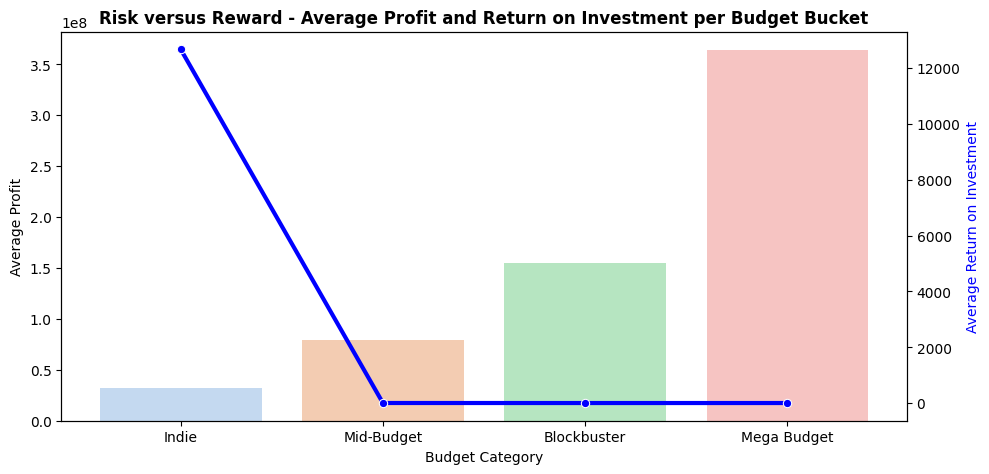

In [8]:
# Plotting risk_analysis
fig, ax1 = plt.subplots(figsize = (10, 5))
# Using the buckets as the x axis and profit for y for a bar graph
sns.barplot(x = risk_analysis.index, y = risk_analysis['profit'], ax = ax1, hue = risk_analysis.index, palette = 'pastel', alpha = 0.7, legend = False)
ax1.set_ylabel("Average Profit")
ax1.set_xlabel("Budget Category")
ax1.set_title("Risk versus Reward - Average Profit and Return on Investment per Budget Bucket", fontweight = "bold")

# creating line graph to see ROI in relation to profit
ax2 = ax1.twinx()
sns.lineplot(x = risk_analysis.index, y = risk_analysis["return_on_investment"], ax = ax2, color = "blue", marker = "o", linewidth = 3)
ax2.set_ylabel("Average Return on Investment", color = "blue")

plt.tight_layout()
plt.show()

This graph shows profit as a bar graph and return on investment as a line graph.  It demonstrates that while large budget films may garner the most profits, due to the amount spent in the budget the trend shows the the best return on investment are the indie films.  This also demonstrates that there is less risk for an indie film than a large budget film.

Text(0.5, 1.0, 'How Movie Quality Affects Financials and Popularity')

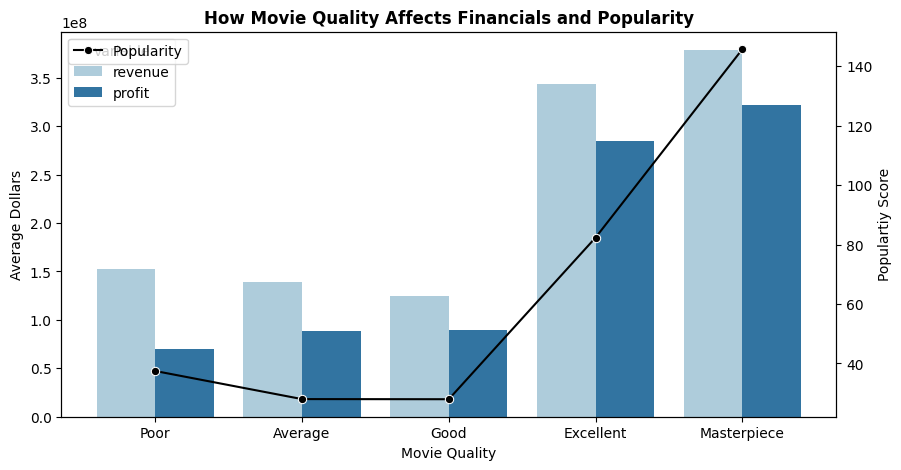

In [9]:
# Plotting quality_analysis
fig, ax1 = plt.subplots(figsize = (10, 5))

# Need to reset index because I want to plot the buckets, but they are being used as index atm
plot_quality = quality_analysis.reset_index()

# Learned how to do melt - will show 2 bars (revenue and profit) per rating_bucket
melted_quality_data = plot_quality.melt(id_vars = "rating_bucket", value_vars = ["revenue", "profit"])
sns.barplot(data = melted_quality_data, x = "rating_bucket", y = "value", ax = ax1, hue = "variable", palette = "Paired")
ax1.set_ylabel("Average Dollars")
ax1.set_xlabel("Movie Quality")

# Line chart to show relation with popularity
ax2 = ax1.twinx()
sns.lineplot(data = plot_quality, x = "rating_bucket", y = "popularity", ax = ax2, color = "black", marker = "o", label = "Popularity")
ax2.set_ylabel("Populartiy Score")

plt.title("How Movie Quality Affects Financials and Popularity", fontweight = "bold")

This graph shows revenue and profit in a bar graph and popularity as a line graph.  As a trend it shows that Excellent and Masterpiece movie qualities tend to be more popular.  This also shows that there is a correlation between better quality movies and the profit that they generate.

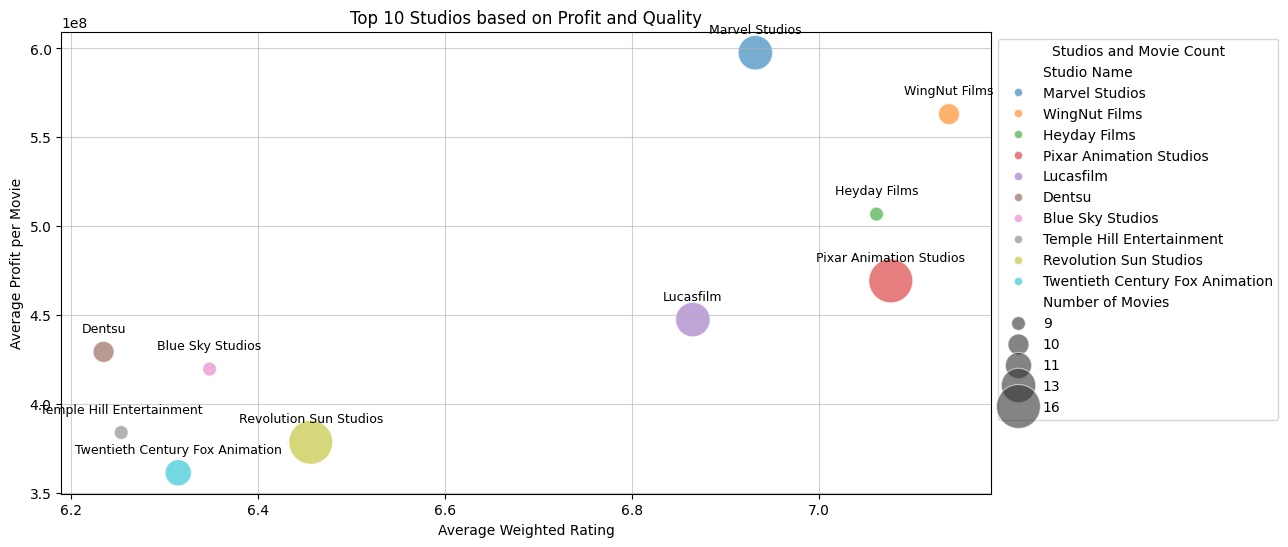

In [10]:
# Plotting Top 10 Studios as a scatter plot
plt.figure(figsize = (12, 6))

# Need to reset index because the studios are being used as index atm
# Renamed columns so that they would show up nicer on the legend
top_10_studios = top_studios.head(10).reset_index().rename(columns = {"title" : "Number of Movies", "production_companies_name" : "Studio Name"})

scatter = sns.scatterplot(data = top_10_studios, x = "weighted_rating", y = "profit", size = "Number of Movies", hue = "Studio Name", sizes = (100, 1000), alpha = 0.6)

# Looping through to add labels to the dots for better readability
for i in range(top_10_studios.shape[0]):
    plt.text(top_10_studios["weighted_rating"][i], top_10_studios["profit"][i] + 11000000, top_10_studios["Studio Name"][i], horizontalalignment = "center", fontsize = 9)

plt.title("Top 10 Studios based on Profit and Quality")
plt.xlabel("Average Weighted Rating")
plt.ylabel("Average Profit per Movie")
plt.legend(bbox_to_anchor = (1, 1), loc = 2, title = "Studios and Movie Count")
plt.grid(True, linestyle = "-", alpha = 0.6)
plt.show()

This is a scatter plot showing the relation between the average profit per movie and the weighted rating of the top 10 studios with more than 8 films released.  This shows the studios that release consistently high profit and high rating movies in the top right quadrant of the scatter plot while the other studios while still successful do not have as good of an average rating which shows in their profits.  Because we filtered the studios that have released over 8 films we ensure that we are seeing the trend of the successful studios not studios that may have released only one film that was rated highly.